# Introduction to Differential Privacy

This notebook has been created to demonstrate the concepts of k-anonymity and differential privacy covered in the Data Security and Protection course of the MAADM Master's program. The notebook includes:

1. Loading and preprocessing a dataset
2. Performing machine learning with differentially private versions of the dataset

**Dataset Download**

https://drive.upm.es/s/5wL1pmyhBMGpYOX/download

In [ ]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import diffprivlib.tools.utils as dp
from diffprivlib.models import LogisticRegression
from diffprivlib.utils import PrivacyLeakWarning, DiffprivlibCompatibilityWarning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression as LR_skl

# Suppress the PrivacyLeakWarning because we are not defining specific bounds for each feature
warnings.simplefilter("ignore", PrivacyLeakWarning)
warnings.simplefilter("ignore", DiffprivlibCompatibilityWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
dataset = pd.read_csv("data/adult_with_synthetic_income.csv", sep=",", index_col=0)
dataset.head()

,SSN,Zip,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target,Income
DOB,,,,,,,,,,,,,,,,,,
9/7/1967,732-14-6110,64152,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,24852
6/7/1988,150-19-2766,61523,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,26753
8/6/1991,725-59-9860,95668,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,27845
4/6/2009,659-57-4974,25503,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,19055
9/16/1951,220-93-3811,75387,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,24221


# Differential Privacy


"Differential Privacy" allows us to introduce controlled errors in operations and measurements performed on the dataset in such a way that the leakage of information during these operations is controlled by the value of ϵ (epsilon). This value determines the amount of noise to be added to a process based on the level of privacy we want to ensure. The smaller ϵ is, the more privacy we maintain, but at the cost of increased measurement errors. Conversely, the larger ϵ is, the lower the error, but also the lower the privacy.


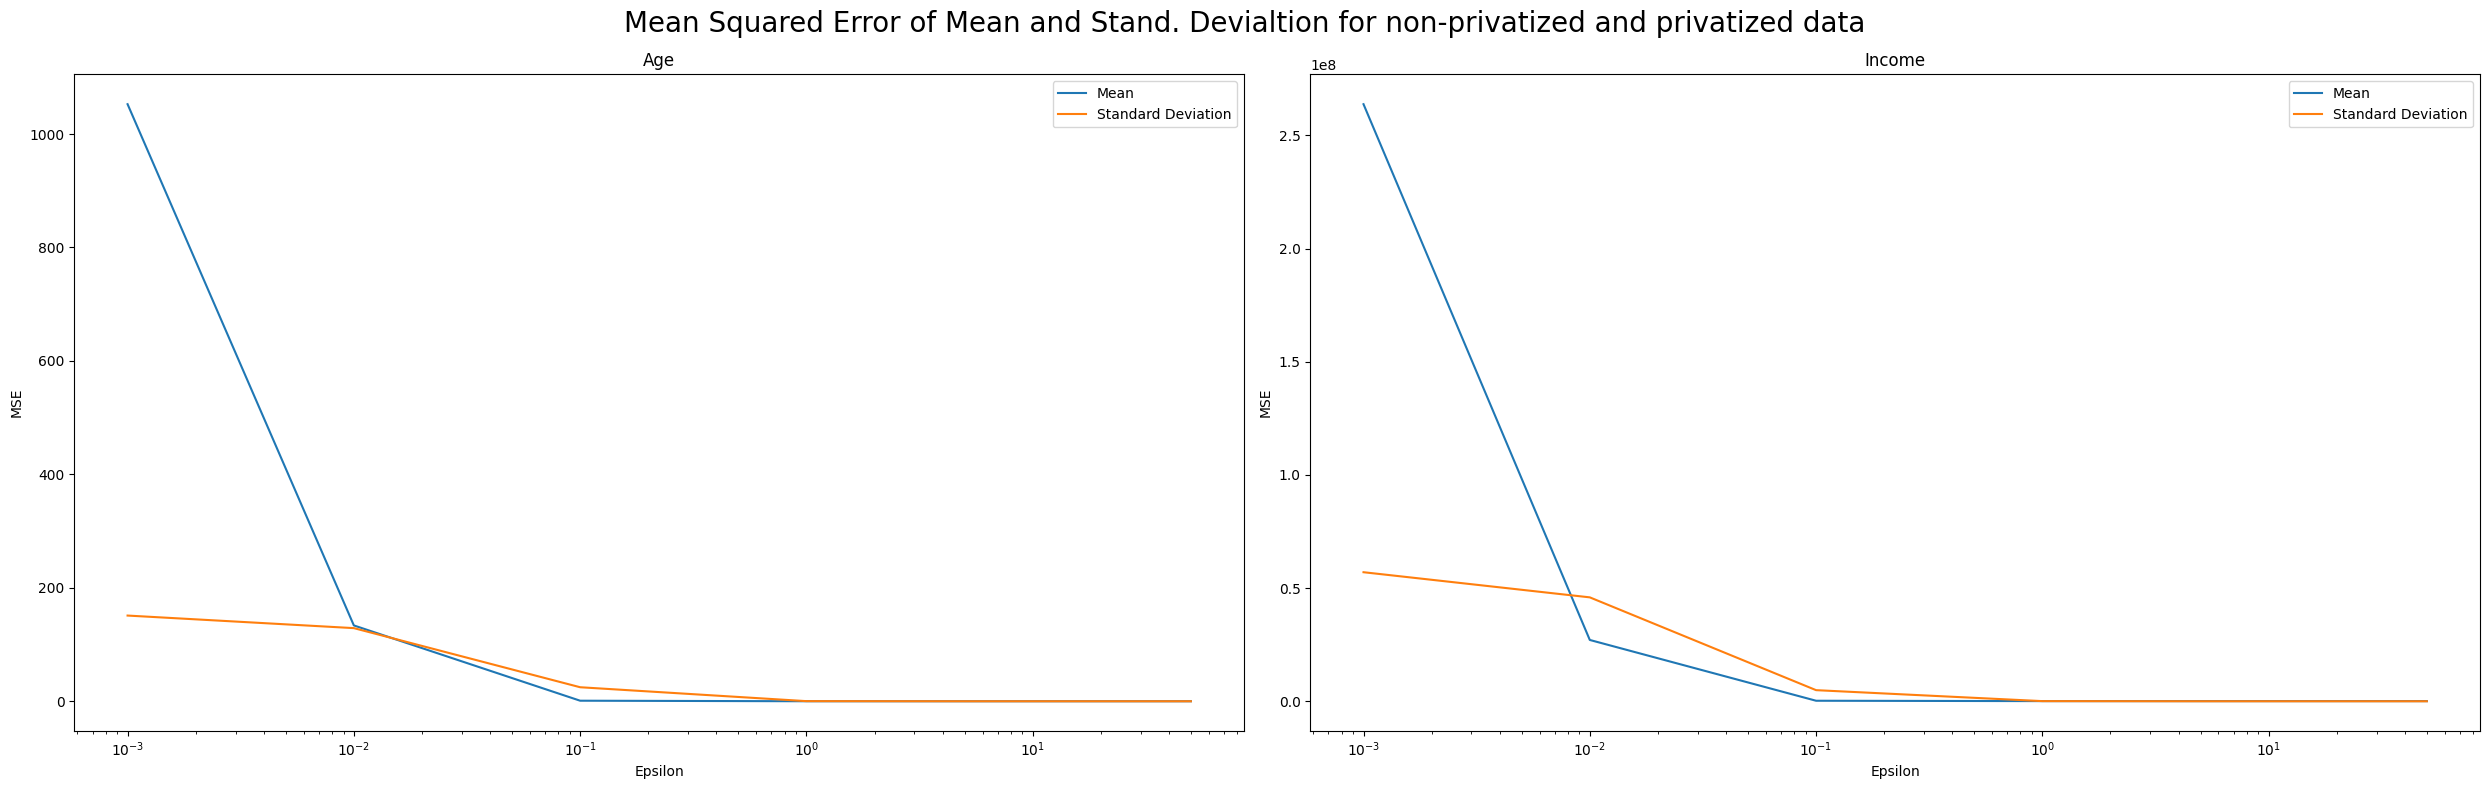

In [9]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(25, 8))
fig.suptitle('Mean Squared Error of Mean and Stand. Devialtion for non-privatized and privatized data', fontsize=20)
axs_list = axs.flatten()
# We use Age and Income becasue those are numeric values.
for index, column in enumerate(["Age", "Income"]):
    values = dataset[column].values

    # We are going to get 1000 random samples and we are going to make that private.
    subsample_size = 1000
    np.random.seed(123)
    idx = np.random.choice(len(values), size=subsample_size, replace=False)
    release_values = values[idx]
    original_values = np.delete(values, idx)

    # Compute the regular mean and standard deviation of the original dataset
    original_mean_values = np.mean(original_values)
    original_std_values = np.std(original_values)

    # Compute the differentially private mean and standard deviation using Diffprivlib
    # We use the following values for epsilon
    epsilon_vals = [0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 50]
    n_runs = 100
    mse_mean_values = []
    mse_std_values = []
    for epsilon in epsilon_vals:
        upper = max(values)
        dp_mean_values = []
        dp_std_values = []
        for i in range(n_runs):
            dp_mean_values.append(dp.mean(release_values, epsilon=epsilon))
            dp_std_values.append(dp.std(release_values, epsilon=epsilon))
        mse_mean = np.mean((dp_mean_values - original_mean_values) ** 2)
        mse_std = np.mean((dp_std_values - original_std_values) ** 2)

        mse_mean_values.append(mse_mean)
        mse_std_values.append(mse_std)


    ax = axs_list[index]
    ax.semilogx(epsilon_vals, mse_mean_values, label="Mean")
    ax.semilogx(epsilon_vals, mse_std_values, label="Standard Deviation")
    ax.set_title(column)
    ax.set_xlabel("Epsilon")
    ax.set_ylabel("MSE")
    ax.legend()

plt.tight_layout()
plt.show()

Ahora vamos a ejecutar un algoritmo de regresión lineal sobre 3 columnas del dataset para averiguar la cuarta columna. Vamos a interar sobre todas ellas y probar diferentes valores de ϵ para ver el efecto que tendría en el accuracy de los resultados obtenidos.


Column Sex is considered the target variable
For Epsilon 0.001
For Epsilon 0.01
For Epsilon 0.1
For Epsilon 1
For Epsilon 5
For Epsilon 10
For Epsilon 16
For Epsilon 20
For Epsilon 27
For Epsilon 38
For Epsilon 50

Column Race is considered the target variable
For Epsilon 0.001
For Epsilon 0.01
For Epsilon 0.1
For Epsilon 1
For Epsilon 5
For Epsilon 10
For Epsilon 16
For Epsilon 20
For Epsilon 27
For Epsilon 38
For Epsilon 50

Column Education is considered the target variable
For Epsilon 0.001
For Epsilon 0.01
For Epsilon 0.1
For Epsilon 1
For Epsilon 5
For Epsilon 10
For Epsilon 16
For Epsilon 20
For Epsilon 27
For Epsilon 38
For Epsilon 50

Column Martial Status is considered the target variable
For Epsilon 0.001
For Epsilon 0.01
For Epsilon 0.1
For Epsilon 1
For Epsilon 5
For Epsilon 10
For Epsilon 16
For Epsilon 20
For Epsilon 27
For Epsilon 38
For Epsilon 50


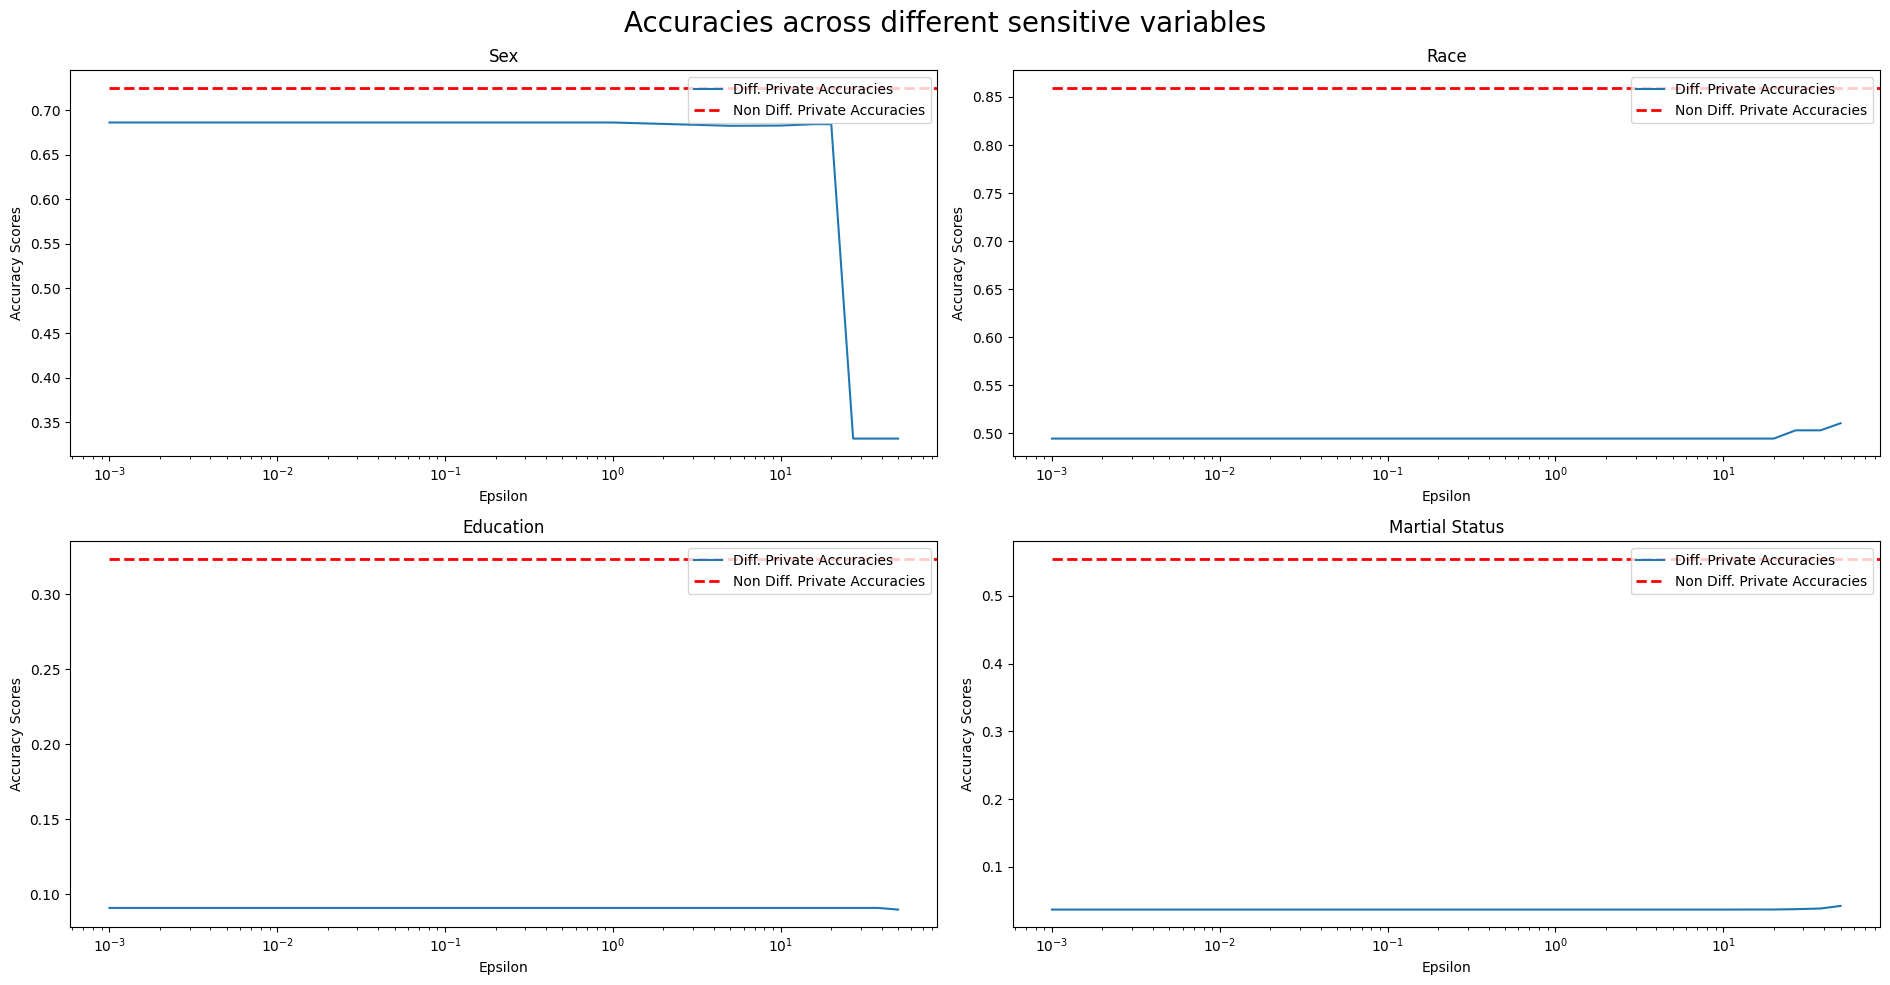

In [6]:
# Repeating the machine learning ptocess across 4 columns
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(19, 10))
fig.suptitle('Accuracies across different sensitive variables', fontsize=20)
axs_list = axs.flatten()
for i, column in enumerate(["Sex", "Race", "Education", "Martial Status"]):
    # Getting the data with the relevant columns
    print("\nColumn {} is considered the target variable".format(column))
    df_ml = dataset[["Sex", "Race", "Education", "Martial Status"]]
    columns = df_ml.columns.values.tolist()
    columns.remove(column)
    df_dummies = pd.get_dummies(df_ml, columns=columns)

    # Deciding the target and input variales; Here we assume the attacker knows all input and is trying to predict the target variable
    x_reg = df_dummies.copy()
    y_reg = x_reg.pop(column)

    # Splitting the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(x_reg, y_reg, random_state = 0)

    # Applying differentially privatized Logistic regression algorith with different values of Epsilon
    accuracy_scores = []
    epsilons = [0.001, 0.01, 0.1, 1, 5, 10, 16, 20, 27, 38, 50]
    for epsilon in epsilons:
        print("For Epsilon " + str(epsilon))
        lg_model = LogisticRegression(epsilon=epsilon, max_iter=500, random_state=42)
        lg_model.fit(X_train, y_train)
        predictions = lg_model.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, predictions))

    # Applying non-privatized Logistic Regression algorithm
    lg_model_2 = LR_skl(max_iter=500, random_state=42)
    lg_model_2.fit(X_train, y_train)
    predictions_2 = lg_model_2.predict(X_test)
    ac_Score = accuracy_score(y_test, predictions_2)

    ax = axs_list[i]
    ax.semilogx(epsilons, accuracy_scores, label='Diff. Private Accuracies')
    ax.hlines(y=ac_Score, xmin=0.001, xmax=100, linewidth=2, color='r', label='Non Diff. Private Accuracies', linestyle='--')
    ax.set_title(column)
    ax.set_xlabel("Epsilon")
    ax.set_ylabel("Accuracy Scores")
    ax.legend()

plt.tight_layout()
plt.show()